# Lesson 1: Exercise 1

## Creating Data and Backtesting a Trading Strategy

---

## Overview

Welcome to this Exercise. We are now going to put our skills to the test and create a dataset and prepare our first backtests. Proper data preparation is essential to conducting succesful backtest, and we want to make sure that we build a solid foundation and develop proper techniques to ensure that we can build our datasets easily at scale and develop proper data wrangling and preparation approaches. In particular, we are going to cover the  essential steps that are necessary to succesfully build trading  models beginning from creating datasets from publicly available stock price data to conducting exploratory data analysis to finally building and testing models. We are then quickly shifts gears and illustrate a few advanced investment ideas that can be used for further analysis.


In [2]:
import sys
import os

# Manually set the path relative to the py file's location that you want to import
# func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../../'))
# Add the path to sys.path
# sys.path.append(func_lib_path)
# Now you can import func_lib
import func_lib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [3]:
#  Create a variable named 'historical_prices' to store historical price data between the dates'2005-01-01' and '2015-01-01'. Use the function 'create_hist_prices()' from 'func_lib' to generate or retrieve the historical prices.
historical_prices = func_lib.create_hist_prices(start_date = '2005-01-01', end_date = '2015-01-01')
historical_prices

[*********************100%***********************]  501 of 501 completed

31 Failed downloads:
['VICI', 'CRWD', 'INVH', 'CTVA', 'LW', 'KHC', 'FOXA', 'KVUE', 'FTV', 'CEG', 'HWM', 'ABNB', 'PYPL', 'CARR', 'UBER', 'SW', 'DOW', 'MRNA', 'OTIS', 'DAY', 'GDDY', 'DELL', 'GEV', 'FOX', 'IR', 'GEHC', 'SOLV', 'PLTR', 'VLTO', 'VST', 'HPE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2005-01-01 -> 2015-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1104555600, endDate = 1420088400")')


Ticker,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,14.388639,0.952312,NaN,14.011133,4.025470,18.694981,30.838949,22.714382,13.590548,21.539530,...,69.677315,12.428696,35.403702,8.482780,25.560429,NaN,11.578525,69.085846,55.509998,NaN
2005-01-04,14.009044,0.962093,NaN,13.870040,3.972643,18.255434,30.024111,22.096430,13.442015,21.195673,...,70.165733,12.237630,35.328079,8.355679,25.386932,NaN,11.425198,69.059723,54.470001,NaN
2005-01-05,14.003020,0.970519,NaN,13.710925,3.949399,18.184534,29.859142,22.196297,13.213033,21.107264,...,69.054146,12.289570,35.727757,8.261529,25.254251,NaN,11.397994,68.520134,52.570000,NaN
2005-01-06,13.695724,0.971271,NaN,14.020138,3.944116,18.021482,29.364239,22.158844,13.485335,20.964808,...,68.767838,12.339648,37.175236,8.247408,25.575741,NaN,11.526587,69.312126,52.650002,NaN
2005-01-07,13.683675,1.041990,NaN,14.260310,3.985321,18.865128,29.384233,22.190046,13.516287,20.925510,...,67.892021,12.532575,35.938412,8.200336,25.407349,NaN,11.462286,69.190292,53.099998,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,37.785423,24.916595,43.365807,37.572750,18.862658,77.415123,74.739998,45.836304,39.511021,68.221214,...,101.827034,24.456480,130.344467,26.233366,60.119228,34.038994,43.093792,102.293159,78.330002,40.648952
2014-12-26,38.015083,25.357046,43.870136,37.696060,18.792923,77.364258,74.669998,45.488750,39.741646,68.189186,...,101.782051,24.463171,129.886703,26.486797,59.753822,34.205856,43.301003,102.346931,78.099998,40.982738
2014-12-29,37.969147,25.339252,43.974934,37.490540,18.846809,76.736938,74.129997,45.327106,39.525902,67.925087,...,102.121620,24.469841,132.158401,26.971924,59.664101,34.126801,43.549652,101.746277,78.050003,40.806572


In [ ]:
forward_returns = lambda t0, t1: (t1 - t0) / t0
forward_returns(14.388639, 14.009044)

In [3]:
# Create a list named 'list_of_momentums' and add 1 to the list
list_of_momentums = [1]
# Compute the total returns using the historical prices and the list of momentums. Use the 'compute_returns()' function from 'func_lib'. Pass 'historical_prices' and 'list_of_momentums' as arguments to 'func_lib.compute_returns()'.
# - Store the result in a variable named 'total_returns'.
total_returns = func_lib.compute_returns(historical_prices, list_of_momentums)
# Use the 'dropna()' method on the 'total_returns' DataFrame.
total_returns.dropna(inplace=True)

In [4]:
# Print the first 5 lines of total returns
total_returns.head()

F_1_d_returns  1_d_returns
Ticker Date                                  
A      2005-01-04      -0.000430    -0.026382
       2005-01-05      -0.021945    -0.000430
       2005-01-06      -0.000880    -0.021945
       2005-01-07      -0.004843    -0.000880
       2005-01-10      -0.017257    -0.004843

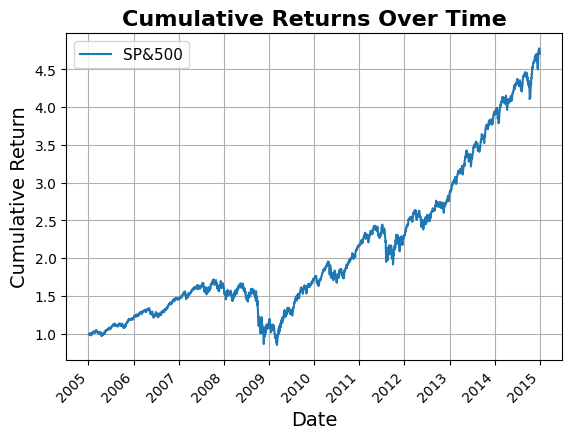

The CAGR is: 16.86%
Sharpe Ratio of Strategy: 0.8


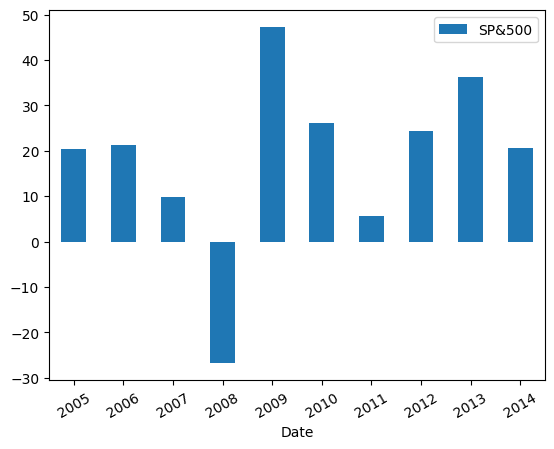

In [5]:
# Compute cumulative and calendar returns from the total returns data. 
# Use the 'compute_BM_Perf()' function from 'func_lib' to perform this calculation. 
# Pass 'total_returns' as an argument to 'func_lib.compute_BM_Perf()'.
# - The function returns two outputs: 'cum_returns' for cumulative returns and 'calendar_returns' for calendar returns.
# - Assign the outputs to the variables 'cum_returns' and 'calendar_returns' respectively.
cum_returns, calendar_returns = func_lib.compute_BM_Perf(total_returns)

In [6]:
cum_returns

,SP&500
Date,
2005-01-04,0.991489
2005-01-05,0.994495
2005-01-06,0.991792
2005-01-07,0.996138
2005-01-10,0.987989
...,...
2014-12-23,4.757557
2014-12-24,4.770790
2014-12-26,4.777896


In [7]:
calendar_returns

,SP&500
Date,
2005,20.343883
2006,21.290662
2007,9.881036
2008,-26.802309
2009,47.248386
2010,26.162440
2011,5.640840
2012,24.469315
2013,36.157881


In [8]:
# Calculate the Relative Strength Index (RSI) for each 'Ticker' and add it to the 'total_returns' DataFrame.
# First, group the 'total_returns' DataFrame by the 'Ticker' column.
# For each group, select the '1_d_returns' column and apply a transformation using the 'calculate_rsi' function from 'func_lib'.
# - Assign the result to a new column named 'RSI' in the 'total_returns' DataFrame.
total_returns['RSI'] = total_returns.groupby('Ticker')[['1_d_returns']].transform(func_lib.calculate_rsi)

In [9]:
# Print out the first 5 rows of the total_returns dataframe
total_returns.head(5)

F_1_d_returns  1_d_returns  RSI
Ticker Date                                       
A      2005-01-04      -0.000430    -0.026382  NaN
       2005-01-05      -0.021945    -0.000430  NaN
       2005-01-06      -0.000880    -0.021945  NaN
       2005-01-07      -0.004843    -0.000880  NaN
       2005-01-10      -0.017257    -0.004843  NaN

In [10]:
#  Define a trading strategy function based on the RSI (Relative Strength Index). 
# Create a function named 'trading_strategy' that accepts one parameter: 'rsi'.
# Inside the function, use an if-else statement to implement the trading logic:
#     - If 'rsi' is less than 65, return 1 (indicating a decision to go long).
#     - Otherwise, return 0 (indicating no position or a different strategy).
# - This function will be used later to determine trading actions based on RSI values.
def trading_strategy(rsi):
    if rsi < 65:
        return 1
    return 0

In [11]:
# Create a variable named 'model_name' and set it to the string "RSI".
model_name = 'RSI'

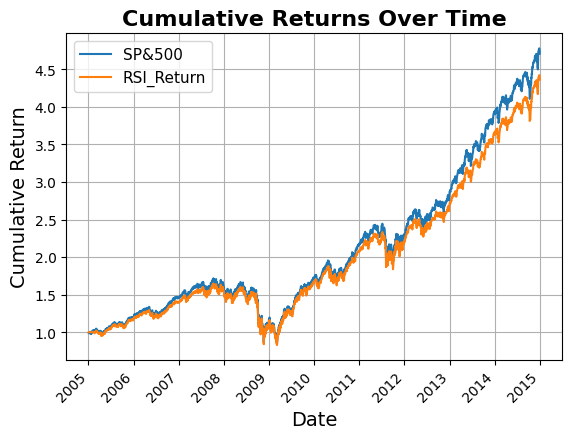

The CAGR is: 15.9%
Sharpe Ratio of Strategy: 0.79


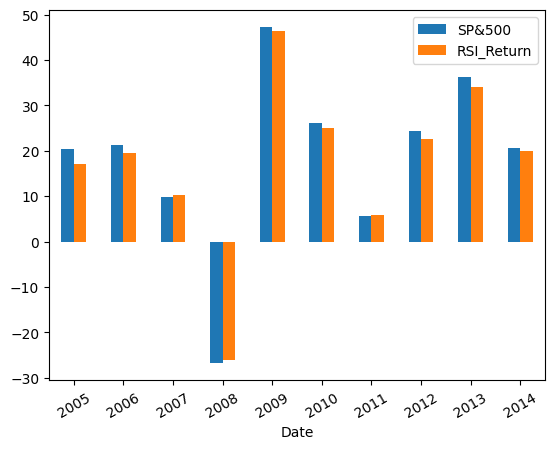

In [12]:
# Compute cumulative and calendar returns for the given trading strategy.
# Use the 'compute_strat_perf()' function from 'func_lib' to perform this calculation.
# Pass 'total_returns', 'cum_returns', 'calendar_returns', 'trading_strategy', and 'model_name' as arguments.
# - The function returns updated 'cum_returns' and 'calendar_returns' based on the strategy's performance.
cum_returns, calendar_returns = func_lib.compute_strat_perf(total_returns, cum_returns, calendar_returns, trading_strategy, model_name)

In [13]:
cum_returns

,SP&500,RSI_Return
Date,,
2005-01-04,0.991489,1.000000
2005-01-05,0.994495,1.000000
2005-01-06,0.991792,1.000000
2005-01-07,0.996138,1.000000
2005-01-10,0.987989,1.000000
...,...,...
2014-12-23,4.757557,4.403190
2014-12-24,4.770790,4.414852
2014-12-26,4.777896,4.421395


In [14]:
calendar_returns

,SP&500,RSI_Return
Date,,
2005,20.343883,17.187642
2006,21.290662,19.524916
2007,9.881036,10.213444
2008,-26.802309,-26.061962
2009,47.248386,46.513120
2010,26.162440,24.999061
2011,5.640840,5.779306
2012,24.469315,22.554356
2013,36.157881,34.054728


In [15]:
# Create the true values (y_test) indicating whether future 1-day returns (F_1_d_returns) are larger or smaller than 0.
# Use the 'np.where()' function to evaluate the 'F_1_d_returns' column in the 'total_returns' DataFrame.
# Store the result in a new column called 'y_test' in the 'total_returns' DataFrame.
total_returns['y_test'] = np.where(total_returns['F_1_d_returns'] > 0, 1, 0)

# Copy the values from the 'Position' column of 'total_returns' to a new column named 'y_pred'.
total_returns['y_pred'] = total_returns['Position']

In [16]:
total_returns

F_1_d_returns  1_d_returns        RSI  Position  \
Ticker Date                                                          
A      2005-01-04      -0.000430    -0.026382        NaN         0   
       2005-01-05      -0.021945    -0.000430        NaN         0   
       2005-01-06      -0.000880    -0.021945        NaN         0   
       2005-01-07      -0.004843    -0.000880        NaN         0   
       2005-01-10      -0.017257    -0.004843        NaN         0   
...                          ...          ...        ...       ...   
ZTS    2014-12-23       0.020247    -0.010136  61.954643         1   
       2014-12-24       0.008211     0.020247  54.714771         1   
       2014-12-26      -0.004299     0.008211  53.964229         1   
       2014-12-29      -0.014997    -0.004299  53.451052         1   
       2014-12-30      -0.007382    -0.014997  53.885926         1   

                   RSI_Return  y_test  y_pred  
Ticker Date                                    
A      2005-01-04   -0.000000       0       0  
       2005-01-05   -0.000000       0       0  
       2005-01-06   -0.000000       0       0  
       2005-01-07   -0.000000       0       0  
       2005-01-10   -0.000000       0       0  
...                       ...     ...     ...  
ZTS    2014-12-23    0.020247       1       1  
       2014-12-24    0.008211       1       1  
       2014-12-26   -0.004299       0       1  
       2014-12-29   -0.014997       0       1  
       2014-12-30   -0.007382       0       1  

[1087739 rows x 7 columns]

In [17]:
# Convert the 'y_test' column from the 'total_returns' DataFrame to a list using the 'tolist()' method.
# Store the result in a variable named 'y_test'.
# Similarly, convert the 'y_pred' column to a list and store it in a variable named 'y_pred'.
y_test = total_returns['y_test'].tolist()
y_pred = total_returns['y_pred'].tolist()

In [18]:
# Calculate the accuracy, precision, and recall of the trading strategy.
# - Use the 'accuracy_score()' function to calculate the accuracy of the predictions.
#     - Pass the actual values (y_test) and the predicted values (y_pred) as arguments.
#     - Store the result in a variable named 'accuracy'.
# - Use the 'precision_score()' function to calculate the precision of the predictions.
#     - Similarly, pass 'y_test' and 'y_pred' as arguments.
#     - Store the result in a variable named 'precision'.
# - Use the 'recall_score()' function to calculate the recall of the predictions.
#     - Again, pass 'y_test' and 'y_pred' as arguments.
#     - Store the result in a variable named 'recall'.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [19]:
# Create a DataFrame named 'metrics_df' using the 'pd.DataFrame()' function.
# Define a dictionary with two keys: 'Metric' and 'Value'.
#     - The 'Metric' key should have a list of strings: ['Accuracy', 'Precision', 'Recall'].
#     - The 'Value' key should have a list of the calculated metrics: [accuracy, precision, recall].
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall'],
                           'Value': [accuracy, precision, recall]})

In [20]:
# Display the 'metrics_df' DataFrame to see the performance of the trading strategy.
metrics_df

,Metric,Value
0,Accuracy,0.511642
1,Precision,0.512523
2,Recall,0.936234
